In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sortedcontainers import SortedDict

# Supporting Functions

In [26]:
def Avg(data):
    temp = 0
    for val in data:
        temp += val
    return temp/len(data)

def Dict_sort(data, x_norm=False, y_norm=False):
    
    Map = SortedDict()
    avg = Avg(data)
    Max_val = 0 
    
    for val in data:
        # Add new item, normalized or not
        if x_norm == True:
             Key = val - avg
        else:
            Key = val

        # Look in the map, if new, make a new entry. otherwise, add one.
        if Map.__contains__(Key) == True:
            Old_val = Map.pop(Key)
            Map.__setitem__(Key,Old_val+1)
        else:
            Map.__setitem__(Key,1)

    if y_norm == True:
        for Key in Map:
            temp = Map.pop(Key)
            Map.__setitem__(Key,temp/len(data))
            
    return Map

def Heat_map(data, x_len=40, y_len=100):
    data_reshaped = [[0]*x_len for i in range(y_len)]
    q=0
    for i in range(0,y_len,1):
        for j in range(0,x_len,1):
            data_reshaped[i][j] = data[q]
            q = q + 1 

    fig, axs = plt.subplots(1,1)
    im = axs.pcolormesh(data_reshaped, cmap='hot')
    plt.rcParams["figure.figsize"] = (6,7)
    plt.colorbar(im, orientation='horizontal',ax=axs)
    plt.show()

# Analysis Functions

In [31]:

# Calulating the SOCF for a time series
def Self_SOCF(data, lag):
    
    # Calculating the sums
    data_sum=0
    sum_t=0
    for i in range(0, len(data)-lag, 1):
        sum_t +=data[i]*data[i+lag]
    
    #Calculating the averages
    avg_t= sum_t/len(data)
    avg = Avg(data)
    
    # Calculating the SOCF
    SOCF = avg_t/(avg**2)
    return SOCF

# Calulating the SOCF between two sets of data
def SOCF(data1, data2):
    
    # Calculating the sums
    sum12=0
    for i in range(0, len(data1), 1):
        sum12+= data1[i]*data2[i]
    
    #Calculating the averages
    avg12= sum12/len(data1)
    avg1= Avg(data1)
    avg2= Avg(data2)
    
    # Calculating the SOCF
    SOCF = avg12/(avg1*avg2)
    return SOCF

# Calculating the Autocorrelation function of a time series
def Self_Auto_Corr(data, lag):
    
    # Calculating the average
    data_avg = Avg(data)

    # Calculating the variance and STD
    var_temp = 0
    for val in data:
        var_temp += (val - data_avg)**2
    var = var_temp/len(data)
    std = var**(1/2)

    # Calculating ACF
    acf_sum = 0
    for val in range(0, len(data)-lag, 1):
        acf_sum += (data[val] - data_avg) * (data[val+lag] - data_avg)
    acf = (acf_sum/(len(data)-lag))/var
    
    return acf
    
# Calculating the Autocorrelation function between to data sets 
def Inter_Auto_Corr(data1,data2):
    
    # Calculating the average
    data1_avg = Avg(data1)
    data2_avg = Avg(data2)

    # Calculating the variance and STD
    var1_temp = 0
    var2_temp = 0
    for val in range(0, len(data1), 1):
        var1_temp += (data1[val] - data1_avg)**2
        var2_temp += (data2[val] - data2_avg)**2
    data1_var = var1_temp/len(data1)
    data2_var = var2_temp/len(data2)
    data1_std = data1_var**(1/2)
    data2_std = data2_var**(1/2)

    # Calculating ACF
    acf_sum = 0
    for val in range(0, len(data1), 1):
        acf_sum += (data1[val] - data1_avg) * (data2[val] - data2_avg)
    acf = (acf_sum/len(data1))/(data1_std*data2_std)
    return acf

def Shannon_entropy(data):
    Map = Dict_sort(data,x_norm = False, y_norm = True)
    entropy = 0
    for val in Map.values():
        entropy -= val*np.log2(val)
    
    return entropy

def Min_entropy(data):
    Map = Dict_sort(data,x_norm = False, y_norm = True)
    entropy = - np.log2(max(Map.values()))
    return entropy

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized * np.log2(c_normalized))
    return H

def calc_mutual_information(U, V):
    N = len(U)
    MI = 0
    for i in np.unique(U):
        for j in np.unique(V):
            # Calculate |U_i ∩ V_j|
            U_i = (U == i)
            V_j = (V == j)
            U_i_V_j = np.sum(np.logical_and(U_i, V_j))
            
            # Calculate |U_i|
            U_i = np.sum(U_i)
            
            # Calculate |V_j|
            V_j = np.sum(V_j)
            
            # Calculate mutual information
            if U_i_V_j > 0:
                MI += (U_i_V_j / N) * np.log(N * U_i_V_j / (U_i * V_j))
    return MI

# Variable Generator

In [7]:
# generate a list of uniformaly distributed random integers between a low and high integers
def uniform_list(data_size, Low_int, High_int):
    data = []
    for i in range(0,data_size,1):
        data.append(random.randint(Low_int, High_int))
    return data

# generate a list of random integers with a poissonian distribution 
def Poisson_list(Center, Samples):
    s = []
    for i in range(0, Samples, 1):
        s.append(np.random.poisson(Center))
    return s

# Investigating SOCF

In [4]:
# Applying the SOCF for a uniform distribution 
data_size= 1000
Min_int=0
Max_int=1
SOCF_array=[]
for q in range(0,300, 1):
    SOCF_array.append(SOCF(uniform_list(data_size, Min_int, Max_int), uniform_list(data_size, Min_int, Max_int)))
    
print(max(SOCF_array), min(SOCF_array), sum(SOCF_array)/len(SOCF_array))

1.0878010878010878 0.9092965971816075 1.0015754600733977


In [195]:
# Applying The SOCF for a poissonian distribution
SOCF_array=[]
center = 300
samples = 1000
for q in range(0,3000, 1):
    SOCF_array.append(SOCF(Poisson_list(center, samples), Poisson_list(center, samples)))
    
print(max(SOCF_array), min(SOCF_array), sum(SOCF_array)/len(SOCF_array))

1.0003705430258323 0.9996086309204462 1.0000039190246302


1.0106369426751594 0.9904780286945892 1.0000011818189132 1.000110635204122


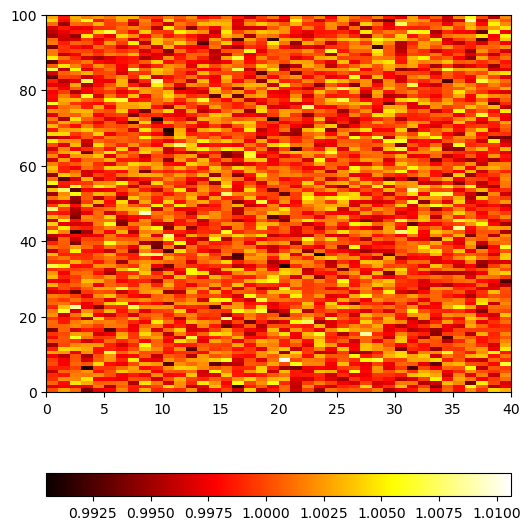

In [33]:
# Applying The SOCF for a similar example to my setup (fix one data set and generate 3599 others and correlate them)
Frames_Number = 10
Dist_Center = 80
SOCF_array=[]
Ref_pixel = Poisson_list(Dist_Center, Frames_Number)

for q in range(0,4000, 1):
    if q == 1830:
        SOCF_array.append(SOCF(Ref_pixel, Ref_pixel))
    else:
        SOCF_array.append(SOCF(Ref_pixel, Poisson_list(Dist_Center, Frames_Number)))
    
print(max(SOCF_array), min(SOCF_array), sum(SOCF_array)/len(SOCF_array),SOCF_array[0] )
Heat_map(SOCF_array)

# Investigating Autocorrelation

In [108]:
# Applying the ACF for a uniform distribution 
data_size= 1000
Min_int=0
Max_int=1
acf_array=[]
for q in range(0,300, 1):
    #acf_array.append(Self_Auto_Corr(uniform_list(data_size, Min_int, Max_int), 2))
    acf_array.append(Inter_Auto_Corr(uniform_list(data_size, Min_int, Max_int), uniform_list(data_size, Min_int, Max_int)))

print(max(acf_array), min(acf_array), sum(acf_array)/len(acf_array))


0.08392157481977346 -0.09187359739826997 -0.00044845588413183784


In [321]:
# Applying the ACF for a poisson distribution 
center = 300
samples = 10000
acf_array=[]
for q in range(0,300, 1):
    acf_array.append(Inter_Auto_Corr(Poisson_list(center, samples), Poisson_list(center, samples)))

print(max(acf_array), min(acf_array), sum(acf_array)/len(acf_array))

0.029056355980330465 -0.03326125905607517 0.00021718070826758882


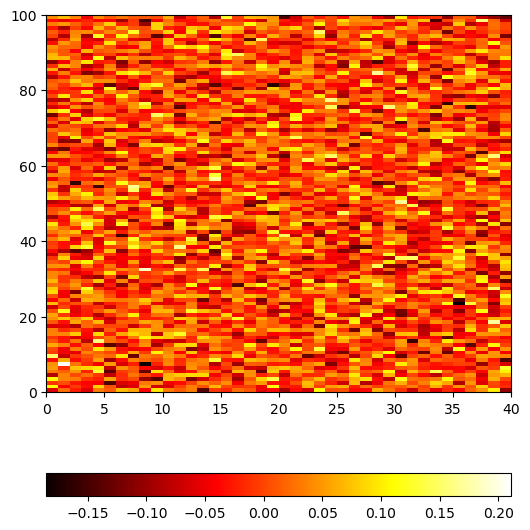

0.21098304883099936 -0.1852678001810276 0.0012702793874207609


In [502]:
# Applying The ACF for a similar example to my setup (fix one data set and generate 3599 others and correlate them)
Frames_Number = 300
Dist_Center = 46
acf_array=[]
Ref_pixel = Poisson_list(Dist_Center, Frames_Number)
for q in range(0,4000, 1):
    #if q == 1500:
    #    acf_array.append(Inter_Auto_Corr(Ref_pixel, Ref_pixel))
    #else:
    acf_array.append(Inter_Auto_Corr(Ref_pixel, Poisson_list(Dist_Center, Frames_Number)))

    
# Plotting the data in surface plot
Heat_map(acf_array)

print(max(acf_array), min(acf_array), sum(acf_array)/len(acf_array))

# Investigating Shannon Entropy

In [352]:
# Applying the entropy for a uniform distribution 
data_size= 10000
Min_int=0
Max_int=1023
entropy_array=[]
for q in range(0,1, 1):
    entropy_array.append(Shannon_entropy(uniform_list(data_size, Min_int, Max_int)))
    
print(max(entropy_array), min(entropy_array), sum(entropy_array)/len(entropy_array))

9.929695677077106 9.929695677077106 9.929695677077106


In [387]:
# Applying the entropy for a poisson distribution 
center = 100
samples = 10000

for q in range(0,100, 1):
    entropy_array.append(Shannon_entropy(Poisson_list(center, samples)))
print(max(entropy_array), min(entropy_array), Avg(entropy_array))
theory = np.log(2*np.pi*np.e*center)/(2*np.log(2))
print("Theoretical entropy is %f"%theory)

9.929695677077106 5.330604368495349 6.172435622078756
Theoretical entropy is 5.369024


# Investigating Minimum Entropy

In [429]:
# Applying the entropy for a uniform distribution 
data_size= 100
Min_int=0
Max_int=1023
entropy_array=[]
for q in range(0,300, 1):
    entropy_array.append(Min_entropy(uniform_list(data_size, Min_int, Max_int)))
    
print(max(entropy_array), min(entropy_array), sum(entropy_array)/len(entropy_array))

6.643856189774724 4.643856189774724 5.584227106359629


In [393]:
# Applying the entropy for a poisson distribution 
center = 100
samples = 10000
entropy_array=[]
for q in range(0,100, 1):
    entropy_array.append(Min_entropy(Poisson_list(center, samples)))
print(max(entropy_array), min(entropy_array), sum(entropy_array)/len(entropy_array))

9.929695677077106 4.4771407448083025 6.024314086993831


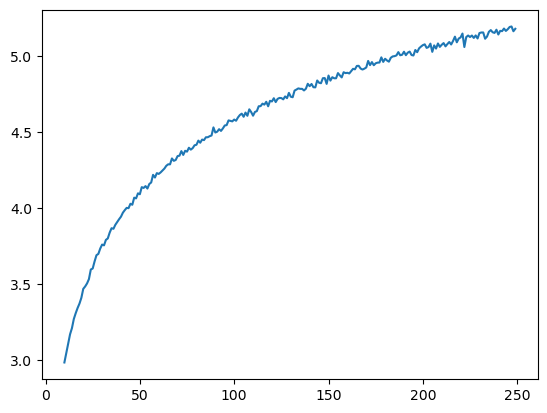

In [30]:
entropy_array=[]
x= []
samples = 10000
for center in np.arange(5,250,):
    x.append(center)
    entropy_array.append(Min_entropy(Poisson_list(center, samples)))
#print(x)
plt.plot(x, entropy_array)

# Investigating Mutual Information

In [ ]:
# Applying the entropy for a uniform distribution 
data_size= 1000
Min_int=0
Max_int=1
MI_array=[]
for q in range(0,100, 1):
    MI_array.append(Mutual_info(uniform_list(data_size, Min_int, Max_int), uniform_list(data_size, Min_int, Max_int)))

print(max(MI_array), min(MI_array), sum(MI_array)/len(MI_array))

NameError: name 'Mutual_info' is not defined

In [486]:
# Applying the entropy for a poisson distribution 
center = 200
samples = 1000

for q in range(0,1000, 1):
    MI_array.append(Mutual_info(Poisson_list(center, samples),Poisson_list(center, samples)))
print(max(MI_array), min(MI_array), Avg(MI_array))

0.13171073654486723 0.0 0.06295108694038144


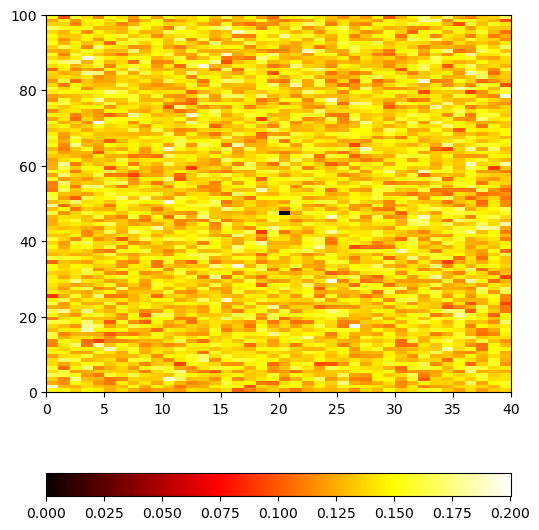

0.20062174115472164 0.0 0.13750564622562172


In [512]:
# Applying The Mif for a similar example to my setup (fix one data set and generate 3599 others and correlate them)
center = 200
samples = 500
MI_array=[]
Ref_pixel = Poisson_list(center, samples)
for q in range(0,4000, 1):
    if q == 1900:
        MI_array.append(Mutual_info(Ref_pixel, Ref_pixel))
    else:
        MI_array.append(Mutual_info(Ref_pixel, Poisson_list(center, samples)))
    
# Plotting the data in surface plot
Heat_map(MI_array)

print(max(MI_array), min(MI_array), sum(MI_array)/len(MI_array))

In [705]:
# Generate samples from two Poisson distributions
center = 200
samples = 5000
x = Poisson_list(center, samples)
y = Poisson_list(center, samples)

# Calculate the mutual information between the two distributions
MI = calc_MI(x, y)
MI1 = Mutual_info(x,y)
print(MI, MI1)

5.840354852314544 0.01380991232849392


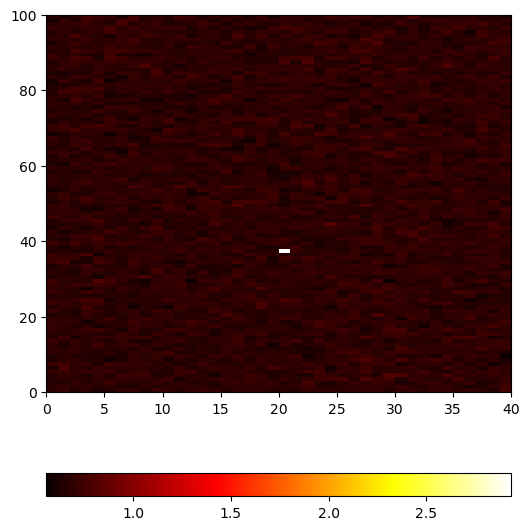

2.9345332435393248 0.5563053272017776 0.683252252055771


In [758]:
# Applying The ACF for a similar example to my setup (fix one data set and generate 3599 others and correlate them)
Frames_Number = 300
Dist_Center = 20
MI_array=[]
Ref_pixel = Poisson_list(Dist_Center, Frames_Number)
for q in range(0,4000, 1):
    if q == 1500:
        MI_array.append(calc_mutual_information(Ref_pixel, Ref_pixel))
    else:
        MI_array.append(calc_mutual_information(Ref_pixel, Poisson_list(Dist_Center, Frames_Number)))

    
# Plotting the data in surface plot
Heat_map(MI_array)

print(max(MI_array), min(MI_array), sum(MI_array)/len(MI_array))

# Time evloution

Cross Correlation

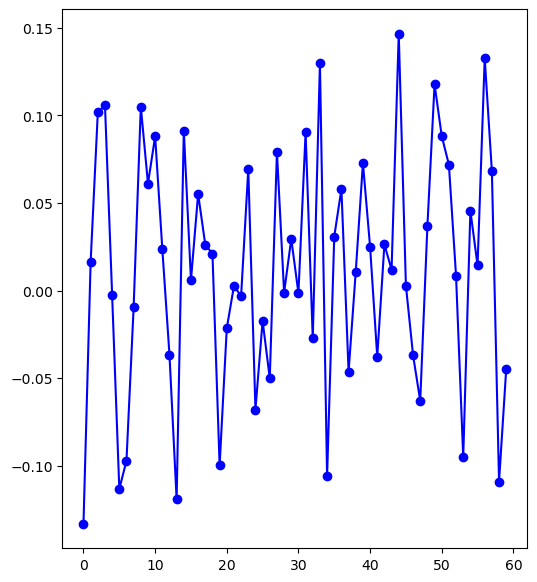

In [764]:
# Applying the ACF for a poisson distribution 
max_lag = 60
center = 30
samples = 300 
x=[]
y=[]
pix1 = Poisson_list(center, samples)
pix2 = Poisson_list(center, samples)
for q in range(0,max_lag, 1):
    x.append(q)
    y.append(Inter_Auto_Corr(pix1[0:samples-max_lag], pix2[q:samples-max_lag+q]))
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='blue')

Mutual Information

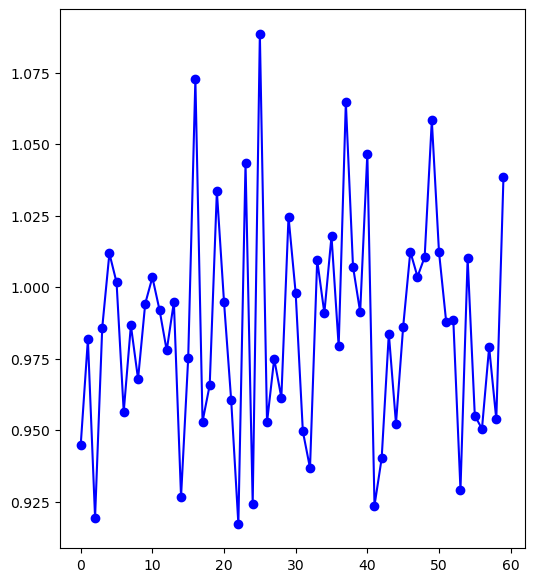

In [765]:
# Applying the Mutual information for a poisson distribution 
max_lag = 60
center = 30
samples = 300 
x=[]
y=[]
pix1 = Poisson_list(center, samples)
pix2 = Poisson_list(center, samples)
for q in range(0,max_lag, 1):
    x.append(q)
    y.append(calc_mutual_information(pix1[0:samples-max_lag], pix2[q:samples-max_lag+q]))
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='blue')